In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

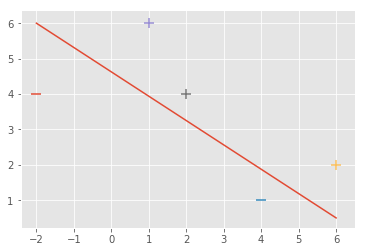

In [2]:
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1,6,-1],
    [2,4,-1],
    [6,2,-1],
])

# Associated output labels
# First 2 are labeled -1 and last 3 are 1
y = np.array([-1,-1,1,1,1])

style.use('ggplot')
# style.use('fivethirtyeight')
# style.use('dark_background')

for d, sample in enumerate(X):
    # Plot the negative samples (first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_',linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+',linewidths=2)

# Print a possible hyperplane that seperates two lines
plt.plot([-2,6],[6,0.5])

In [3]:
def svm_gd(X,y,nb_epoch):
    
    w = np.zeros([3])
    eta = 1
    errors = []
    
    for epoch in range(1,nb_epoch):
        error = 0
        for i in range(len(X)):
            if (y[i] * np.dot(X[i],w)) < 1:
                loss = (-2 * (1/epoch) * w)
                w = w + eta * ((y[i] * X[i]) + loss)
                error = 1
#                 print("Epoch : {} / {} :: Train_loss : {}".format(epoch,nb_epoch,loss))
#                 print("Inside If")
            else:
                loss = (-2 * (1/epoch) * w)
                w = w + eta * loss
#                 print("Epoch : {} / {} :: Train_loss : {}".format(epoch,nb_epoch,loss))
#                 print("Inside Else")
                
        errors.append(error)
    return errors, w
    

In [4]:
err, weight = svm_gd(X,y,100000)

In [5]:
len(err)

99999

(0.5, 1.5)

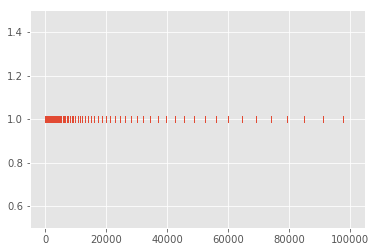

In [6]:
plt.plot(err,'|')
plt.ylim(0.50,1.5)

In [7]:
# w = np.zeros([3])
# eta = 0.1
# nb_epoch = 1000
# for epoch in range(1,nb_epoch):
#     for i in range(len(X)):
#         if np.any(y[i] * (np.dot(X[i],w)) < 1):
#             w = w + eta * ((y[i] * X[i]) + (-2 * (1 / epoch) * w) )
#             print(w)
#         else:
#             w = w + eta * (-2 * (1/epoch) * w)
#             print("Inside Else..........")
#             print(w)

In [8]:
weight

array([  1.58876117,   3.17458055,  11.11863105])

In [9]:
# for i, sample in enumerate(X):
    
#     if i < 2:
#         plt.scatter(sample[0], sample[1], marker='+', s=120, c='r')
    
#     else:
#         plt.scatter(sample[0], sample[1], marker='_', s=120, c='b')
        
        
x2 = np.array([weight[0], weight[1], -weight[1], weight[0]])
x3 = np.array([weight[0], weight[1], weight[1], -weight[0]])


In [10]:
x2

array([ 1.58876117,  3.17458055, -3.17458055,  1.58876117])

In [11]:
x3

array([ 1.58876117,  3.17458055,  3.17458055, -1.58876117])

In [12]:
x2x3 = np.array([x2,x3])

In [13]:
x2x3

array([[ 1.58876117,  3.17458055, -3.17458055,  1.58876117],
       [ 1.58876117,  3.17458055,  3.17458055, -1.58876117]])

In [14]:
x,Y,U,V = zip(*x2x3)

In [15]:
x

(1.5887611677029299, 1.5887611677029299)

In [16]:
Y

(3.1745805514807812, 3.1745805514807812)

In [17]:
U

(-3.1745805514807812, 3.1745805514807812)

In [18]:
V

(1.5887611677029299, -1.5887611677029299)

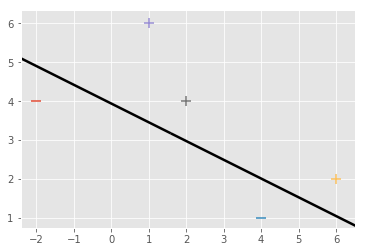

In [19]:
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_',linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+',linewidths=2)


axes = plt.gca()
axes.quiver(x,Y,U,V,scale=1)